In [ ]:
import pandas as pd
file_path = 'spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

missing_values = data.isnull().sum()

# Display the cleaned data and missing values information
data.head(), missing_values


(  label                                            message
 0   ham  Go until jurong point, crazy.. Available only ...
 1   ham                      Ok lar... Joking wif u oni...
 2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
 3   ham  U dun say so early hor... U c already then say...
 4   ham  Nah I don't think he goes to usf, he lives aro...,
 label      0
 message    0
 dtype: int64)

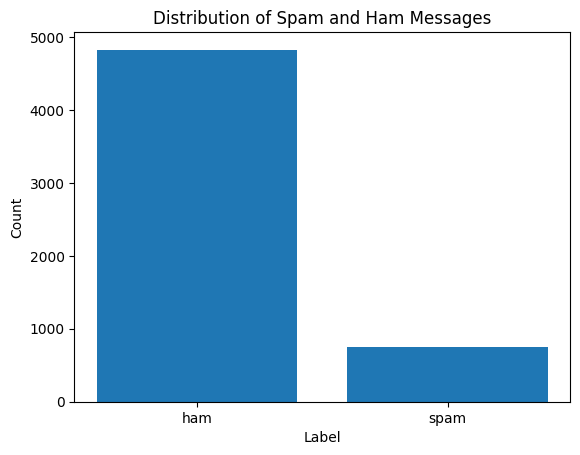

In [ ]:
import matplotlib.pyplot as plt
label_counts = data['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42, stratify=data['label'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4457,), (1115,), (4457,), (1115,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
print("Training Data:")
print(X_train_tfidf)
print("\nTesting Data:")
print(X_test_tfidf)


Training Data:
  (0, 664)	0.7530459188603245
  (0, 1399)	0.4873194928223273
  (0, 1375)	0.442087724329911
  (1, 1417)	0.5129190863911842
  (1, 3306)	0.5671613510816021
  (1, 3245)	0.4057508888511612
  (1, 3327)	0.5006078593584175
  (2, 450)	0.45757856953723397
  (2, 2720)	0.5273475254454433
  (2, 1720)	0.43422567767943154
  (2, 2812)	0.5090778610374438
  (2, 2165)	0.25458639467223243
  (3, 892)	0.34475764096733075
  (3, 3323)	0.34987376854088503
  (3, 1043)	0.4506483740689983
  (3, 320)	0.3892511616136998
  (3, 1462)	0.283925600366258
  (3, 1034)	0.3189912349316709
  (3, 483)	0.3087304244762197
  (3, 2817)	0.3555931125727191
  (4, 3330)	0.6216860952863269
  (4, 1236)	0.7832664929177298
  (5, 2547)	0.47423919298684947
  (5, 3349)	0.6225340102497139
  (5, 2542)	0.6225340102497139
  :	:
  (4455, 824)	0.2409826986072783
  (4455, 2832)	0.2409826986072783
  (4455, 1616)	0.24455882885818417
  (4455, 1125)	0.45005981691083363
  (4455, 422)	0.2060355163377874
  (4455, 732)	0.19657546933935258
 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Training
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluating
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9739910313901345


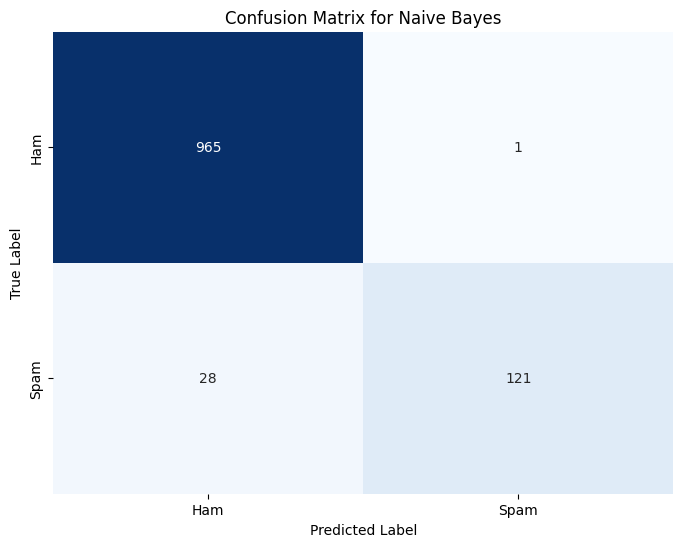

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Training
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluating
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9730941704035875


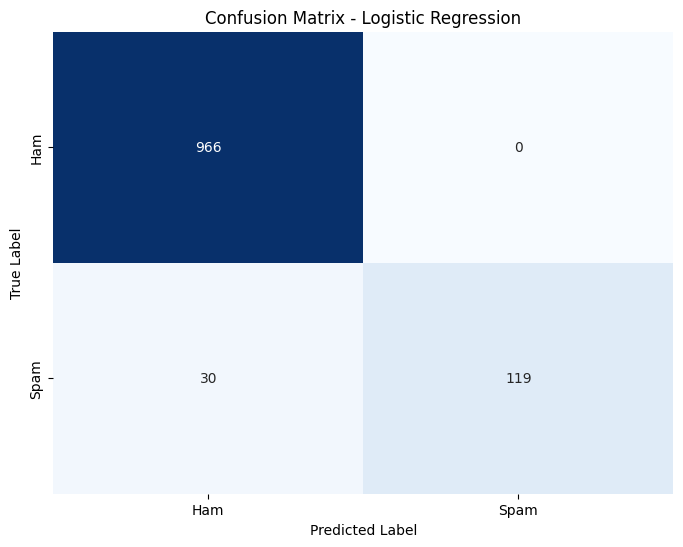

In [ ]:
import matplotlib.pyplot as plt
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [ ]:
from sklearn.svm import LinearSVC

# Training
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluating
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9820627802690582


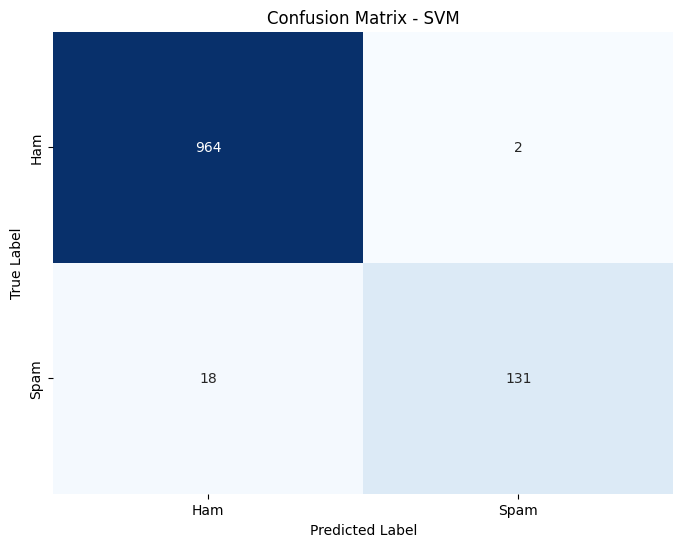

In [ ]:
import matplotlib.pyplot as plt
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


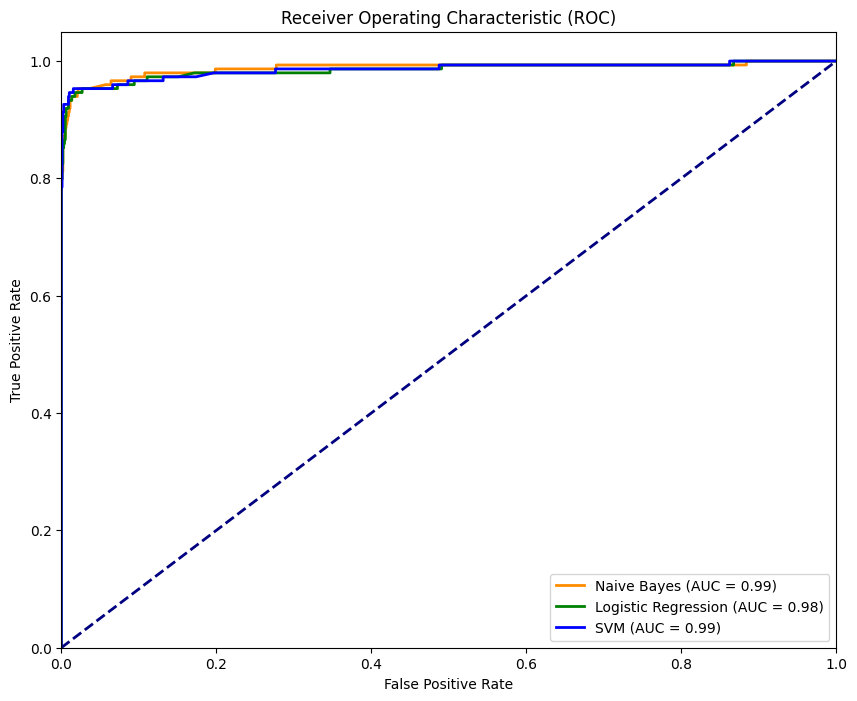

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]
y_pred_prob_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]
y_pred_prob_svm = svm_model.decision_function(X_test_tfidf)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(10, 8))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
